## Business Understanding

Financial institutions, such as banks and microfinance organizations, regularly face the challenge of lending money to customers while minimizing the risk of loan defaults. Every loan carries a certain level of risk: some customers repay on time, while others may default due to financial constraints, poor credit history, or unforeseen circumstances. Efficiently managing this risk is critical for the profitability and sustainability of the institution.
Credit scoring is all about assessing the creditworthiness of loan applicants. The goal is to predict the likelihood that a customer or a business will default on a loan so that the bank can make informed lending decisions.


## Business Problem
Evercrest Bank has a pool of customers individual and Small and Medium sized Enterprises (SMEs) applying for loans.
<br>Not all applicants have the same repayment capacity.
<br>Evercrest Bank uses traditional loan approval process which relies on manual assessments, subjective judgment, or incomplete evaluation of a customer’s financial history. 
<br>The process is inconsistent, leading to Lending to high risk customers welcoming losses and rejecting low risk customers which leads to losing business opportunities

We need a data driven model that predicts the probability of default for each applicant either as an individual or SMEs.

## Project Objective
The main objective of this project is to develop a data-driven credit scoring system that predicts the likelihood of a customer defaulting on a loan. This model will help the bank make informed, consistent, and fair lending decisions, ultimately improving risk management and profitability.
<br>This the projects matters because of the following reasons.
1. **Risk management**- Reduce financial losses from loan defaults.

2. **Regulatory compliance** -Banks must comply with financial regulations on lending and risk.

3. **Profitability** - Proper credit scoring allows offering loans to low-risk customers while charging appropriate interest for higher risk ones.

4. **Customer fairness** - Ensures decisions are data driven, consistent, and unbiased.

## Key Deliverables:

1. Data understanding and cleaning: Understand data fields, handle missing values, and correct inconsistencies.

2. Feature engineering: Create meaningful variables (ratios, prior default info, loan characteristics).

3. Exploratory analysis: Identify factors that influence default risk.

4. Model development: Build ML models (e.g., LightGBM, Random Forest) to predict defaults.

5. Model evaluation: Use metrics like AUC-ROC, KS, and confusion matrix.

6. Business insights: Explain which factors most affect default risk.

7. Deployment-ready solution: Provide predictions or scorecards for new applicants.

##  Data Understanding and Cleaning
The data used in this project is from a loan management system (LMS) where each record represents a single loan issued to a customer or SMEs. We will begin by importing it to this notebook

In [1]:
#Let us import the Data to the Notebook
import zipfile
import pandas as pd
# We start by reading the application csv
with zipfile.ZipFile("Data/application_data.csv.zip") as z:
    with z.open("application_data.csv") as f:
        df=pd.read_csv(f)
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
# Read the previous application data of users
with zipfile.ZipFile("Data/previous_application.csv.zip") as z:
    with z.open("previous_application.csv") as s:
        df2=pd.read_csv(s)
df2.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Since the application data is so big, we are going to narrow down to 31 columns
df_application=df[[
 'TARGET',
 'SK_ID_CURR',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'OCCUPATION_TYPE'
]
]

In [26]:
# Check for null values
((df_application.isna().sum())/len(df_application))*100

TARGET                  0.000000
SK_ID_CURR              0.000000
NAME_CONTRACT_TYPE      0.000000
CODE_GENDER             0.000000
FLAG_OWN_CAR            0.000000
FLAG_OWN_REALTY         0.000000
CNT_CHILDREN            0.000000
AMT_INCOME_TOTAL        0.000000
AMT_CREDIT              0.000000
AMT_ANNUITY             0.003902
AMT_GOODS_PRICE         0.090403
NAME_INCOME_TYPE        0.000000
NAME_EDUCATION_TYPE     0.000000
NAME_FAMILY_STATUS      0.000000
NAME_HOUSING_TYPE       0.000000
DAYS_BIRTH              0.000000
DAYS_EMPLOYED           0.000000
OCCUPATION_TYPE        31.345545
dtype: float64

In [4]:
# Likewise the previous data has alot of columns that are not in our interest.We will narrow to 9 columns
df_previous=df2[[
 'SK_ID_CURR',
 'NAME_CONTRACT_STATUS',      # approved, refused, unused offer
 'NAME_CONTRACT_TYPE',        # loan type
 'AMT_APPLICATION',           # amount requested
 'AMT_CREDIT',                # amount granted
 'AMT_ANNUITY',
 'NAME_YIELD_GROUP',
 'CODE_REJECT_REASON',
 'CNT_PAYMENT'
]]


In [9]:
#Check for percentage null values
((df_previous.isna().sum())/len(df_previous))*100

SK_ID_CURR               0.000000
NAME_CONTRACT_STATUS     0.000000
NAME_CONTRACT_TYPE       0.000000
AMT_APPLICATION          0.000000
AMT_CREDIT               0.000060
AMT_ANNUITY             22.286665
NAME_YIELD_GROUP         0.000000
CODE_REJECT_REASON       0.000000
CNT_PAYMENT             22.286366
dtype: float64

In [5]:
prev_agg = df_previous.groupby('SK_ID_CURR').agg({
    'AMT_APPLICATION': ['mean', 'max'],
    'AMT_CREDIT': ['mean', 'max'],
    'AMT_ANNUITY': ['mean'],
    'CNT_PAYMENT': ['mean'],
    'NAME_CONTRACT_STATUS': 'nunique',
    'NAME_CONTRACT_TYPE': 'nunique',
    'CODE_REJECT_REASON': 'nunique'
})


In [6]:
prev_agg.columns = ['_'.join(col) for col in prev_agg.columns]
prev_agg.reset_index(inplace=True)


In [34]:
df_master = df_application.merge(prev_agg, on='SK_ID_CURR', how='left')


# Explonatory Data Analysis
We will start by  checking the distribution of the target to know class imbalance

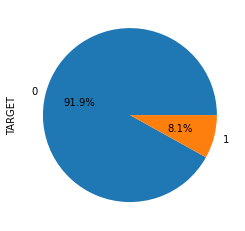

In [32]:
# Check class imbalance
df_master["TARGET"].value_counts().plot(kind="pie",autopct='%1.1f%%');

We see that we have 91.9 % data of customers who did not default while 8.1 % of customers who actually defaulted

### Check if Defaulters have Low Income
The first step is to check for outliers.
Secondly, if present we will perform capping

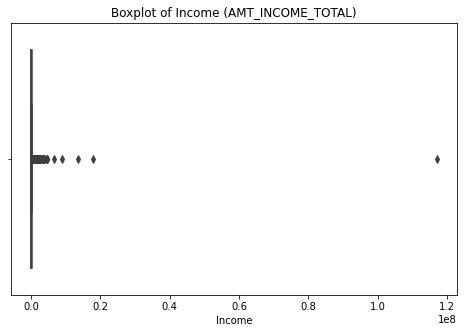

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.boxplot(x=df_master['AMT_INCOME_TOTAL'])
plt.title('Boxplot of Income (AMT_INCOME_TOTAL)')
plt.xlabel('Income')
plt.show()


Yes, outliers exists, lets perform capping to remove outliers

In [36]:
import numpy as np

# Calculate the 99th percentile (upper cap)
upper_cap = df_master['AMT_INCOME_TOTAL'].quantile(0.95)

# Replace values above the cap with the cap
df_master['AMT_INCOME_TOTAL'] = np.where(
    df_master['AMT_INCOME_TOTAL'] > upper_cap,
    upper_cap,
    df_master['AMT_INCOME_TOTAL']
)

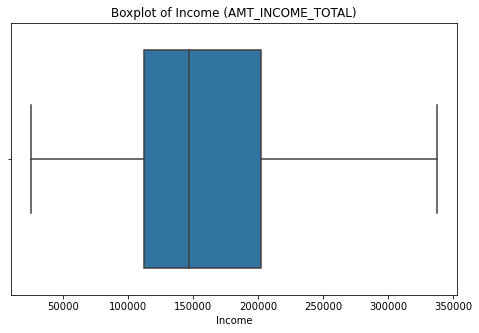

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.boxplot(x=df_master['AMT_INCOME_TOTAL'])
plt.title('Boxplot of Income (AMT_INCOME_TOTAL)')
plt.xlabel('Income')
plt.show()


<AxesSubplot:xlabel='TARGET'>

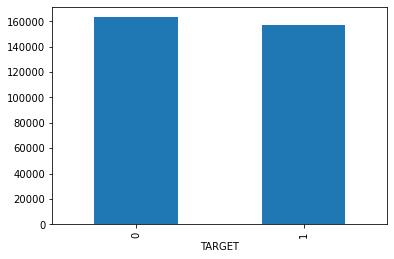

In [39]:
# Plot to see the distribution of defaults against our target
df_master.groupby('TARGET')['AMT_INCOME_TOTAL'].mean().plot(kind="bar");


### Intepretation
Income alone does not strongly differentiate defaulters from non-defaulters in this dataset.

Applicants with both low and moderate income can default or not, so income is not a strong predictor by itself.

### Employment and age risk patterns

In [46]:
# Age in years
df_master['AGE_YEARS'] = (-df_master['DAYS_BIRTH']) // 365

# Employment length in years
df_master['EMPLOYED_YEARS'] = (-df_master['DAYS_EMPLOYED']) // 365

49

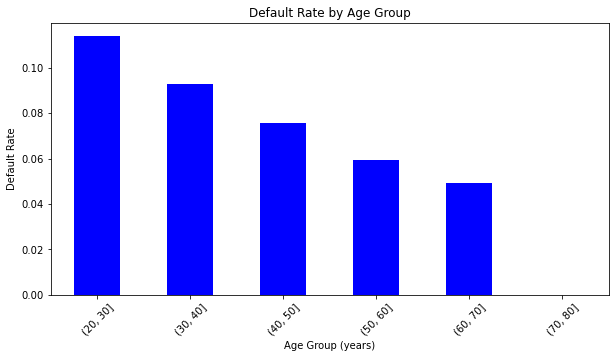

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Create age bins
df_master['AGE_BIN'] = pd.cut(df_master['AGE_YEARS'], bins=[20,30,40,50,60,70,80])

# Calculate default rate per age bin
age_default_rate = df_master.groupby('AGE_BIN')['TARGET'].mean()

# Plot
plt.figure(figsize=(10,5))
age_default_rate.plot(kind='bar', color='blue')
plt.title('Default Rate by Age Group')
plt.xlabel('Age Group (years)')
plt.ylabel('Default Rate')
plt.xticks(rotation=45)
plt.show()


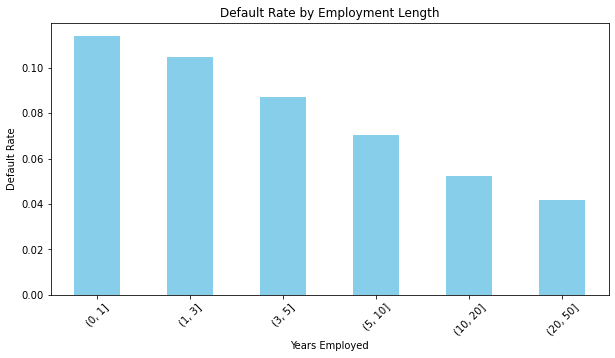

In [48]:
# Clean extreme employment values (e.g., 365243 means unemployed/missing)
df_master['EMPLOYED_YEARS_CLEAN'] = df_master['EMPLOYED_YEARS'].replace({365243: np.nan})

# Create bins
df_master['EMPLOYED_BIN'] = pd.cut(df_master['EMPLOYED_YEARS_CLEAN'], bins=[0,1,3,5,10,20,50])

# Default rate per employment bin
emp_default_rate = df_master.groupby('EMPLOYED_BIN')['TARGET'].mean()

# Plot
plt.figure(figsize=(10,5))
emp_default_rate.plot(kind='bar', color='skyblue')
plt.title('Default Rate by Employment Length')
plt.xlabel('Years Employed')
plt.ylabel('Default Rate')
plt.xticks(rotation=45)
plt.show()



Analysis shows that default risk decreases with age. 
<br>Younger borrowers are more likely to default, while older borrowers tend to be more financially stable and reliable in meeting credit obligations.”
<br> Also, applicants with longer employment history have lower default risk. 
<br>Shorter employment duration is associated with higher probability of default, indicating that job stability is an important factor in credit risk assessment.”

### Feature Engineering
First, we will examine the Debt To Income ratio.
<br>It is calculated by total monthly debts divided by total montly gross Income
<br>Higher DIT may indicate higher loan default, and that is what we can investigate in our dataset

### Debt-to-Income Ratio (DTI)

In [52]:
#Create a DIT column
df_master['DEBT_TO_INCOME'] = df_master['AMT_CREDIT'] / df_master['AMT_INCOME_TOTAL']


### Age & Employment Stability

In [59]:
# Combine age and employment into a simple stability feature
df_master['EMPLOYMENT_STABILITY'] = df_master['EMPLOYED_YEARS'] / df_master['AGE_YEARS']
# A higher ratio implies higher stability

### Default Rate by Income Source and Occupation

In [62]:
# Average default rate per income type
income_default_rate = df_master.groupby('NAME_INCOME_TYPE')['TARGET'].mean()
df_master['INCOME_TYPE_DEFAULT_RATE'] = df_master['NAME_INCOME_TYPE'].map(income_default_rate)

# Average default rate per occupation
occupation_default_rate = df_master.groupby('OCCUPATION_TYPE')['TARGET'].mean()
df_master['OCCUPATION_DEFAULT_RATE'] = df_master['OCCUPATION_TYPE'].map(occupation_default_rate)


### Credit-to-Annuity Ratio

In [63]:
df_master['CREDIT_TO_ANNUITY'] = df_master['AMT_CREDIT'] / df_master['AMT_ANNUITY']


### Rejected Contract History

In [64]:
# Count of rejections normalized by total contracts
df_master['REJECTION_RATE'] = df_master['CODE_REJECT_REASON_nunique'] / df_master['NAME_CONTRACT_TYPE_nunique']


### Good vs Bad Borrower Patterns in Aggregated Features - Engineered Risk Score

In [87]:
# Example of a simple “risk score”
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# cols = ["DEBT_TO_INCOME", "CREDIT_TO_ANNUITY", "EMPLOYMENT_STABILITY", "REJECTION_RATE"]

# df_master_scaled = pd.DataFrame(
#     scaler.fit_transform(df_master[cols]),
#     columns = cols
# )

# df_master_scaled['RISK_SCORE'] = (
#     0.4 * df_master_scaled['DEBT_TO_INCOME'] +
#     0.3 * df_master_scaled['CREDIT_TO_ANNUITY'] +
#     0.1 * df_master_scaled['REJECTION_RATE'] -
#     0.2 * df_master_scaled['EMPLOYMENT_STABILITY']
# )
# 1. Risk flags
df_master['RISK_DTI'] = np.where(df_master['DEBT_TO_INCOME'] > 0.35, 1, 0)  # higher threshold
df_master['RISK_CREDIT_ANNUITY'] = np.where(df_master['CREDIT_TO_ANNUITY'] > 0.25, 1, 0)
df_master['RISK_REJECTIONS'] = np.where(df_master['REJECTION_RATE'] >= 1, 1, 0)  # more inclusive
df_master['RISK_EMPLOYMENT'] = np.where(df_master['EMPLOYMENT_STABILITY'] < 10, 1, 0)  # stricter low employment



# 2. Total points
df_master['RISK_POINTS'] = (
    df_master['RISK_DTI'] +
    df_master['RISK_CREDIT_ANNUITY'] +
    df_master['RISK_REJECTIONS']+
    df_master['RISK_EMPLOYMENT']
)

# 3. Risk label
df_master['RISK_LEVEL'] = df_master['RISK_POINTS'].map({
    0: 'GOOD',
    1: 'MEDIUM',
    2: 'HIGH',
    3: 'VERY HIGH',
    4: 'Extreme'
})


In [91]:
# Set thresholds at percentiles
DTI_thresh = df_master['DEBT_TO_INCOME'].quantile(0.75)  # top 25% risky
CreditAnnuity_thresh = df_master['CREDIT_TO_ANNUITY'].quantile(0.75)
Employment_thresh = df_master['EMPLOYMENT_STABILITY'].quantile(0.25)  # bottom 25% risky
Rejection_thresh = 1  # at least 1 rejection = risky

df_master['RISK_DTI'] = np.where(df_master['DEBT_TO_INCOME'] > DTI_thresh, 1, 0)
df_master['RISK_CREDIT_ANNUITY'] = np.where(df_master['CREDIT_TO_ANNUITY'] > CreditAnnuity_thresh, 1, 0)
df_master['RISK_REJECTIONS'] = np.where(df_master['REJECTION_RATE'] >= Rejection_thresh, 1, 0)
df_master['RISK_EMPLOYMENT'] = np.where(df_master['EMPLOYMENT_STABILITY'] < Employment_thresh, 1, 0)

df_master['RISK_POINTS'] = (
    df_master['RISK_DTI'] +
    df_master['RISK_CREDIT_ANNUITY'] +
    df_master['RISK_REJECTIONS'] +
    df_master['RISK_EMPLOYMENT']
)

df_master['RISK_LEVEL'] = df_master['RISK_POINTS'].map({
    0: 'GOOD',
    1: 'MEDIUM',
    2: 'HIGH',
    3: 'VERY HIGH',
    4: 'EXTREME'
})


### Test the Engineered Risk score

In [93]:
def calculate_risk_level(dti, credit_annuity, employment, rejections):
    # Create binary risk flags
    risk_dti = 1 if dti > DTI_thresh else 0
    risk_ca = 1 if credit_annuity > CreditAnnuity_thresh else 0
    risk_emp = 1 if employment < Employment_thresh else 0
    risk_rej = 1 if rejections >= Rejection_thresh else 0
    
    # Total points
    total_points = risk_dti + risk_ca + risk_emp + risk_rej
    
    # Map points to risk levels
    if total_points == 0:
        return "GOOD"
    elif total_points == 1:
        return "MEDIUM"
    elif total_points == 2:
        return "HIGH"
    elif total_points == 3:
        return "VERY HIGH"
    else:  # total_points == 4
        return "EXTREME"


In [114]:
# Example 1
print(calculate_risk_level(dti=0.15, credit_annuity=0.2, employment=10, rejections=0))
# Output: 'GOOD'

# Example 2
print(calculate_risk_level(dti=0.35, credit_annuity=0.25, employment=1, rejections=9))
# Output: 'EXTREME'


GOOD
EXTREME


In [115]:
#Check how Risk level is being destributed
df_master['RISK_LEVEL'].value_counts()


MEDIUM       136728
GOOD          68772
HIGH          67157
VERY HIGH     29916
EXTREME        4938
Name: RISK_LEVEL, dtype: int64

In [116]:
df_master.columns

Index(['TARGET', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'OCCUPATION_TYPE',
       'AMT_APPLICATION_mean', 'AMT_APPLICATION_max', 'AMT_CREDIT_mean',
       'AMT_CREDIT_max', 'AMT_ANNUITY_mean', 'CNT_PAYMENT_mean',
       'NAME_CONTRACT_STATUS_nunique', 'NAME_CONTRACT_TYPE_nunique',
       'CODE_REJECT_REASON_nunique', 'AGE_YEARS', 'EMPLOYED_YEARS', 'AGE_BIN',
       'EMPLOYED_YEARS_CLEAN', 'EMPLOYED_BIN', 'DEBT_TO_INCOME',
       'EMPLOYMENT_STABILITY', 'INCOME_TYPE_DEFAULT_RATE',
       'OCCUPATION_DEFAULT_RATE', 'CREDIT_TO_ANNUITY', 'REJECTION_RATE',
       'RISK_SCORE', 'RISK_DTI', 'RISK_CREDIT_ANNUITY', 'RISK_REJECTIONS',
       'RISK_POINTS', 'RISK_LEVEL', 'RISK_EMPLOYMENT'],
      dtype='object')

In [117]:
df_master.dtypes


TARGET                             int64
SK_ID_CURR                         int64
NAME_CONTRACT_TYPE                object
CODE_GENDER                       object
FLAG_OWN_CAR                      object
FLAG_OWN_REALTY                   object
CNT_CHILDREN                       int64
AMT_INCOME_TOTAL                 float64
AMT_CREDIT                       float64
AMT_ANNUITY                      float64
AMT_GOODS_PRICE                  float64
NAME_INCOME_TYPE                  object
NAME_EDUCATION_TYPE               object
NAME_FAMILY_STATUS                object
NAME_HOUSING_TYPE                 object
DAYS_BIRTH                         int64
DAYS_EMPLOYED                      int64
OCCUPATION_TYPE                   object
AMT_APPLICATION_mean             float64
AMT_APPLICATION_max              float64
AMT_CREDIT_mean                  float64
AMT_CREDIT_max                   float64
AMT_ANNUITY_mean                 float64
CNT_PAYMENT_mean                 float64
NAME_CONTRACT_ST

In [119]:

y = df_master['TARGET'] 
df_model = df_master.drop(columns=[
    'SK_ID_CURR',           # ID
    'TARGET',               # label already separated
    'AGE_BIN', 'EMPLOYED_BIN',  # binned versions (keep raw numeric)
    'RISK_SCORE', 'RISK_POINTS', 'RISK_LEVEL',  # derived risk flags (optional)
    'RISK_DTI', 'RISK_CREDIT_ANNUITY', 'RISK_REJECTIONS', 'RISK_EMPLOYMENT'
])

categorical_cols = [
    'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
    'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
    'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE'
]

numeric_cols = [
    'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
    'AGE_YEARS', 'EMPLOYED_YEARS', 'DEBT_TO_INCOME', 'CREDIT_TO_ANNUITY', 'REJECTION_RATE'
]

# Features to use for modeling
features = categorical_cols + numeric_cols

#final modeling dataframe
X = df_model[features]


## Modelling

In [120]:
# One-hot encoding
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)


## Scale numeric features

In [121]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_encoded[numeric_cols] = scaler.fit_transform(X_encoded[numeric_cols])


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\Users\\samwel\\anaconda3\\envs\\learn-env\\Lib\\site-packages\\~klearn\\cluster\\_dbscan_inner.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.




  Attempting uninstall: joblib
    Found existing installation: joblib 0.17.0
    Uninstalling joblib-0.17.0:
      Successfully uninstalled joblib-0.17.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Successfully uninstalled scikit-learn-0.23.2


In [122]:
#Train test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)


AttributeError: module 'numpy' has no attribute 'int'.
`np.int` was a deprecated alias for the builtin `int`. To avoid this error in existing code, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [13]:
df_master['AGE_YEARS'] = (-df_master['DAYS_BIRTH']) / 365
df_master['EMPLOY_YEARS'] = (-df_master['DAYS_EMPLOYED']) / 365


In [14]:
df_master['CREDIT_INCOME_RATIO'] = df_master['AMT_CREDIT'] / df_master['AMT_INCOME_TOTAL']
df_master['ANNUITY_INCOME_RATIO'] = df_master['AMT_ANNUITY'] / df_master['AMT_INCOME_TOTAL']
df_master['CREDIT_GOODS_RATIO'] = df_master['AMT_CREDIT'] / df_master['AMT_GOODS_PRICE']


In [15]:
df_master.head()

,TARGET,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_ANNUITY_mean,CNT_PAYMENT_mean,NAME_CONTRACT_STATUS_nunique,NAME_CONTRACT_TYPE_nunique,CODE_REJECT_REASON_nunique,AGE_YEARS,EMPLOY_YEARS,CREDIT_INCOME_RATIO,ANNUITY_INCOME_RATIO,CREDIT_GOODS_RATIO
0,1,100002,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,9251.775,24.000000,1.0,1.0,1.0,25.920548,1.745205,2.007889,0.121978,1.158397
1,0,100003,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,56553.990,10.000000,1.0,2.0,1.0,45.931507,3.254795,4.790750,0.132217,1.145199
2,0,100004,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,5357.250,4.000000,1.0,1.0,1.0,52.180822,0.616438,2.000000,0.100000,1.000000
3,0,100006,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,23651.175,23.000000,3.0,3.0,2.0,52.068493,8.326027,2.316167,0.219900,1.052803
4,0,100007,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,12278.805,20.666667,1.0,2.0,1.0,54.608219,8.323288,4.222222,0.179963,1.000000


In [16]:
df_master.columns

Index(['TARGET', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'OCCUPATION_TYPE',
       'AMT_APPLICATION_mean', 'AMT_APPLICATION_max', 'AMT_CREDIT_mean',
       'AMT_CREDIT_max', 'AMT_ANNUITY_mean', 'CNT_PAYMENT_mean',
       'NAME_CONTRACT_STATUS_nunique', 'NAME_CONTRACT_TYPE_nunique',
       'CODE_REJECT_REASON_nunique', 'AGE_YEARS', 'EMPLOY_YEARS',
       'CREDIT_INCOME_RATIO', 'ANNUITY_INCOME_RATIO', 'CREDIT_GOODS_RATIO'],
      dtype='object')

In [32]:
df_master.fillna(-999, inplace=True)


In [33]:
from sklearn.preprocessing import LabelEncoder

for col in df_master.select_dtypes('object'):
    le = LabelEncoder()
    df_master[col] = le.fit_transform(df_master[col].astype(str))


In [34]:
from sklearn.model_selection import train_test_split

X = df_master.drop(['TARGET'], axis=1)
y = df_master['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [35]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=300, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=300, random_state=42)

In [36]:
from sklearn.metrics import roc_auc_score

preds = model.predict_proba(X_test)[:,1]
roc_auc_score(y_test, preds)


0.6617936431103568

In [38]:
import lightgbm as lgb

# lgb_model = lgb.LGBMClassifier(
#     n_estimators=1000,
#     learning_rate=0.05,
#     max_depth=7,
#     random_state=42,
#     class_weight='balanced'
# )
lgb_model = lgb.LGBMClassifier(
    n_estimators=2000,
    learning_rate=0.03,
    max_depth=8,
    class_weight={0:1, 1:10},  # increase weight for default class
    random_state=42
)


lgb_model.fit(X_train, y_train)
preds = lgb_model.predict_proba(X_test)[:,1]
roc_auc_score(y_test, preds)


[LightGBM] [Info] Number of positive: 19876, number of negative: 226132
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.096807 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4559
[LightGBM] [Info] Number of data points in the train set: 246008, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.467789 -> initscore=-0.129021
[LightGBM] [Info] Start training from score -0.129021


0.6907121736738963

In [48]:
!pip install xgboost


In [49]:
import xgboost as xgb
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

# Assuming df_master is your final dataset with features + target
X = df_master.drop(['TARGET', 'SK_ID_CURR'], axis=1)
y = df_master['TARGET']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize XGBoost classifier
xgb_model = xgb.XGBClassifier(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=7,
    scale_pos_weight=(y == 0).sum() / (y == 1).sum(),  # handle class imbalance
    eval_metric='auc',
    use_label_encoder=False,
    random_state=42
)

# Train the model
xgb_model.fit(X_train, y_train, 
              eval_set=[(X_test, y_test)], 
              early_stopping_rounds=50, 
              verbose=50)

# Predict probabilities
y_pred = xgb_model.predict_proba(X_test)[:,1]

# Evaluate ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC-AUC: {roc_auc:.4f}")


[18:01:36] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { use_label_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-auc:0.65886
Will train until validation_0-auc hasn't improved in 50 rounds.
[50]	validation_0-auc:0.68994
[100]	validation_0-auc:0.69504
[150]	validation_0-auc:0.69629
Stopping. Best iteration:
[146]	validation_0-auc:0.69642

ROC-AUC: 0.6964


In [50]:
import pandas as pd

# Aggregate previous applications per client
prev_agg = df_previous.groupby('SK_ID_CURR').agg({
    'AMT_APPLICATION': ['mean', 'max'],
    'AMT_CREDIT': ['mean', 'max'],
    'AMT_ANNUITY': ['mean'],
    'CNT_PAYMENT': ['mean'],
    'NAME_CONTRACT_STATUS': 'nunique',
    'NAME_CONTRACT_TYPE': 'nunique',
    'CODE_REJECT_REASON': 'nunique'
})

# Flatten multi-index columns
prev_agg.columns = ['_'.join(col).upper() for col in prev_agg.columns]
prev_agg.reset_index(inplace=True)

# Count of approved/refused loans
status_counts = df_previous.pivot_table(
    index='SK_ID_CURR', 
    columns='NAME_CONTRACT_STATUS', 
    values='AMT_CREDIT', 
    aggfunc='count',
    fill_value=0
).reset_index()

# Merge counts with aggregated features
prev_agg = prev_agg.merge(status_counts, on='SK_ID_CURR', how='left')


In [51]:
# Select your Kenya-focused features
df_master = df_application.copy()
df_master = df_master.merge(prev_agg, on='SK_ID_CURR', how='left')

# Fill missing previous loan info with 0
df_master.fillna(0, inplace=True)


In [52]:
# Derived ratios
df_master['CREDIT_INCOME_RATIO'] = df_master['AMT_CREDIT'] / df_master['AMT_INCOME_TOTAL']
df_master['ANNUITY_INCOME_RATIO'] = df_master['AMT_ANNUITY'] / df_master['AMT_INCOME_TOTAL']
df_master['CREDIT_GOODS_RATIO'] = df_master['AMT_CREDIT'] / df_master['AMT_GOODS_PRICE']


In [58]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
cat_cols = [
    'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
    'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
    'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE'
]

# Apply LabelEncoder
for col in cat_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col].astype(str))
    X_test[col] = le.transform(X_test[col].astype(str))


<ipython-input-58-beed0e0b1391>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = le.fit_transform(X_train[col].astype(str))
<ipython-input-58-beed0e0b1391>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[col] = le.transform(X_test[col].astype(str))


In [53]:
from sklearn.model_selection import train_test_split

X = df_master.drop(['TARGET', 'SK_ID_CURR'], axis=1)
y = df_master['TARGET']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [59]:
import lightgbm as lgb
import xgboost as xgb

# LightGBM
lgb_model = lgb.LGBMClassifier(
    n_estimators=2000,
    learning_rate=0.03,
    max_depth=8,
    class_weight={0:1, 1:10},
    random_state=42
)
lgb_model.fit(X_train, y_train, eval_set=[(X_test, y_test)])

# XGBoost
xgb_model = xgb.XGBClassifier(
    n_estimators=2000,
    learning_rate=0.03,
    max_depth=7,
    scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum(),
    eval_metric='auc',
    use_label_encoder=False,
    random_state=42
)
xgb_model.fit(X_train, y_train, eval_set=[(X_test, y_test)])


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 19860, number of negative: 226148
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.048380 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3877
[LightGBM] [Info] Number of data points in the train set: 246008, number of used features: 32
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.467571 -> initscore=-0.129897
[LightGBM] [Info] Start training from score -0.129897
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

[213]	validation_0-auc:0.70020
[214]	validation_0-auc:0.70021
[215]	validation_0-auc:0.70014
[216]	validation_0-auc:0.70013
[217]	validation_0-auc:0.70020
[218]	validation_0-auc:0.70021
[219]	validation_0-auc:0.70027
[220]	validation_0-auc:0.70024
[221]	validation_0-auc:0.70027
[222]	validation_0-auc:0.70026
[223]	validation_0-auc:0.70024
[224]	validation_0-auc:0.70022
[225]	validation_0-auc:0.70032
[226]	validation_0-auc:0.70030
[227]	validation_0-auc:0.70028
[228]	validation_0-auc:0.70027
[229]	validation_0-auc:0.70033
[230]	validation_0-auc:0.70036
[231]	validation_0-auc:0.70039
[232]	validation_0-auc:0.70044
[233]	validation_0-auc:0.70043
[234]	validation_0-auc:0.70049
[235]	validation_0-auc:0.70047
[236]	validation_0-auc:0.70046
[237]	validation_0-auc:0.70052
[238]	validation_0-auc:0.70053
[239]	validation_0-auc:0.70052
[240]	validation_0-auc:0.70059
[241]	validation_0-auc:0.70056
[242]	validation_0-auc:0.70056
[243]	validation_0-auc:0.70059
[244]	validation_0-auc:0.70061
[245]	va

[478]	validation_0-auc:0.70069
[479]	validation_0-auc:0.70069
[480]	validation_0-auc:0.70072
[481]	validation_0-auc:0.70077
[482]	validation_0-auc:0.70078
[483]	validation_0-auc:0.70087
[484]	validation_0-auc:0.70086
[485]	validation_0-auc:0.70086
[486]	validation_0-auc:0.70083
[487]	validation_0-auc:0.70083
[488]	validation_0-auc:0.70080
[489]	validation_0-auc:0.70084
[490]	validation_0-auc:0.70083
[491]	validation_0-auc:0.70085
[492]	validation_0-auc:0.70089
[493]	validation_0-auc:0.70092
[494]	validation_0-auc:0.70090
[495]	validation_0-auc:0.70087
[496]	validation_0-auc:0.70081
[497]	validation_0-auc:0.70080
[498]	validation_0-auc:0.70080
[499]	validation_0-auc:0.70080
[500]	validation_0-auc:0.70078
[501]	validation_0-auc:0.70078
[502]	validation_0-auc:0.70081
[503]	validation_0-auc:0.70083
[504]	validation_0-auc:0.70080
[505]	validation_0-auc:0.70078
[506]	validation_0-auc:0.70081
[507]	validation_0-auc:0.70081
[508]	validation_0-auc:0.70081
[509]	validation_0-auc:0.70081
[510]	va

[743]	validation_0-auc:0.69913
[744]	validation_0-auc:0.69914
[745]	validation_0-auc:0.69913
[746]	validation_0-auc:0.69914
[747]	validation_0-auc:0.69912
[748]	validation_0-auc:0.69910
[749]	validation_0-auc:0.69907
[750]	validation_0-auc:0.69908
[751]	validation_0-auc:0.69908
[752]	validation_0-auc:0.69909
[753]	validation_0-auc:0.69909
[754]	validation_0-auc:0.69911
[755]	validation_0-auc:0.69910
[756]	validation_0-auc:0.69912
[757]	validation_0-auc:0.69911
[758]	validation_0-auc:0.69911
[759]	validation_0-auc:0.69912
[760]	validation_0-auc:0.69910
[761]	validation_0-auc:0.69906
[762]	validation_0-auc:0.69905
[763]	validation_0-auc:0.69907
[764]	validation_0-auc:0.69909
[765]	validation_0-auc:0.69911
[766]	validation_0-auc:0.69908
[767]	validation_0-auc:0.69899
[768]	validation_0-auc:0.69898
[769]	validation_0-auc:0.69899
[770]	validation_0-auc:0.69899
[771]	validation_0-auc:0.69901
[772]	validation_0-auc:0.69900
[773]	validation_0-auc:0.69900
[774]	validation_0-auc:0.69899
[775]	va

[1008]	validation_0-auc:0.69675
[1009]	validation_0-auc:0.69672
[1010]	validation_0-auc:0.69673
[1011]	validation_0-auc:0.69671
[1012]	validation_0-auc:0.69670
[1013]	validation_0-auc:0.69673
[1014]	validation_0-auc:0.69671
[1015]	validation_0-auc:0.69668
[1016]	validation_0-auc:0.69667
[1017]	validation_0-auc:0.69664
[1018]	validation_0-auc:0.69661
[1019]	validation_0-auc:0.69659
[1020]	validation_0-auc:0.69659
[1021]	validation_0-auc:0.69657
[1022]	validation_0-auc:0.69658
[1023]	validation_0-auc:0.69658
[1024]	validation_0-auc:0.69658
[1025]	validation_0-auc:0.69658
[1026]	validation_0-auc:0.69656
[1027]	validation_0-auc:0.69655
[1028]	validation_0-auc:0.69652
[1029]	validation_0-auc:0.69646
[1030]	validation_0-auc:0.69645
[1031]	validation_0-auc:0.69645
[1032]	validation_0-auc:0.69644
[1033]	validation_0-auc:0.69640
[1034]	validation_0-auc:0.69640
[1035]	validation_0-auc:0.69639
[1036]	validation_0-auc:0.69638
[1037]	validation_0-auc:0.69636
[1038]	validation_0-auc:0.69634
[1039]	v

[1265]	validation_0-auc:0.69372
[1266]	validation_0-auc:0.69370
[1267]	validation_0-auc:0.69370
[1268]	validation_0-auc:0.69371
[1269]	validation_0-auc:0.69368
[1270]	validation_0-auc:0.69368
[1271]	validation_0-auc:0.69362
[1272]	validation_0-auc:0.69366
[1273]	validation_0-auc:0.69364
[1274]	validation_0-auc:0.69359
[1275]	validation_0-auc:0.69358
[1276]	validation_0-auc:0.69357
[1277]	validation_0-auc:0.69352
[1278]	validation_0-auc:0.69352
[1279]	validation_0-auc:0.69350
[1280]	validation_0-auc:0.69349
[1281]	validation_0-auc:0.69345
[1282]	validation_0-auc:0.69347
[1283]	validation_0-auc:0.69342
[1284]	validation_0-auc:0.69339
[1285]	validation_0-auc:0.69339
[1286]	validation_0-auc:0.69337
[1287]	validation_0-auc:0.69337
[1288]	validation_0-auc:0.69334
[1289]	validation_0-auc:0.69329
[1290]	validation_0-auc:0.69329
[1291]	validation_0-auc:0.69330
[1292]	validation_0-auc:0.69329
[1293]	validation_0-auc:0.69328
[1294]	validation_0-auc:0.69328
[1295]	validation_0-auc:0.69329
[1296]	v

[1522]	validation_0-auc:0.69125
[1523]	validation_0-auc:0.69124
[1524]	validation_0-auc:0.69124
[1525]	validation_0-auc:0.69123
[1526]	validation_0-auc:0.69123
[1527]	validation_0-auc:0.69124
[1528]	validation_0-auc:0.69123
[1529]	validation_0-auc:0.69123
[1530]	validation_0-auc:0.69121
[1531]	validation_0-auc:0.69120
[1532]	validation_0-auc:0.69117
[1533]	validation_0-auc:0.69113
[1534]	validation_0-auc:0.69112
[1535]	validation_0-auc:0.69114
[1536]	validation_0-auc:0.69112
[1537]	validation_0-auc:0.69110
[1538]	validation_0-auc:0.69110
[1539]	validation_0-auc:0.69106
[1540]	validation_0-auc:0.69103
[1541]	validation_0-auc:0.69101
[1542]	validation_0-auc:0.69099
[1543]	validation_0-auc:0.69095
[1544]	validation_0-auc:0.69092
[1545]	validation_0-auc:0.69091
[1546]	validation_0-auc:0.69091
[1547]	validation_0-auc:0.69091
[1548]	validation_0-auc:0.69089
[1549]	validation_0-auc:0.69089
[1550]	validation_0-auc:0.69089
[1551]	validation_0-auc:0.69093
[1552]	validation_0-auc:0.69093
[1553]	v

[1779]	validation_0-auc:0.68878
[1780]	validation_0-auc:0.68876
[1781]	validation_0-auc:0.68875
[1782]	validation_0-auc:0.68873
[1783]	validation_0-auc:0.68872
[1784]	validation_0-auc:0.68870
[1785]	validation_0-auc:0.68871
[1786]	validation_0-auc:0.68870
[1787]	validation_0-auc:0.68873
[1788]	validation_0-auc:0.68873
[1789]	validation_0-auc:0.68872
[1790]	validation_0-auc:0.68872
[1791]	validation_0-auc:0.68870
[1792]	validation_0-auc:0.68871
[1793]	validation_0-auc:0.68870
[1794]	validation_0-auc:0.68870
[1795]	validation_0-auc:0.68869
[1796]	validation_0-auc:0.68869
[1797]	validation_0-auc:0.68869
[1798]	validation_0-auc:0.68872
[1799]	validation_0-auc:0.68876
[1800]	validation_0-auc:0.68875
[1801]	validation_0-auc:0.68874
[1802]	validation_0-auc:0.68872
[1803]	validation_0-auc:0.68872
[1804]	validation_0-auc:0.68870
[1805]	validation_0-auc:0.68870
[1806]	validation_0-auc:0.68872
[1807]	validation_0-auc:0.68873
[1808]	validation_0-auc:0.68871
[1809]	validation_0-auc:0.68872
[1810]	v

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='auc',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.03, max_delta_step=0,
              max_depth=7, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=2000, n_jobs=0,
              num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=11.38710976837865, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [60]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

# Predict class labels
y_pred = lgb_model.predict(X_test)

# Predict probabilities for ROC-AUC
y_prob = lgb_model.predict_proba(X_test)[:,1]


In [61]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f"Accuracy:  {accuracy:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(f"ROC-AUC:   {roc_auc:.4f}")


Accuracy:  0.7590
Recall:    0.4828
Precision: 0.1636
F1 Score:  0.2444
ROC-AUC:   0.6986


In [62]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, classification_report
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression


In [68]:
prev_agg = df_previous.groupby('SK_ID_CURR').agg({
    'AMT_APPLICATION': ['mean', 'max'],
    'AMT_CREDIT': ['mean', 'max'],
    'AMT_ANNUITY': ['mean'],
    'CNT_PAYMENT': ['mean'],
    'NAME_CONTRACT_STATUS': 'nunique',
    'NAME_CONTRACT_TYPE': 'nunique',
    'CODE_REJECT_REASON': 'nunique'
})

# Flatten multi-index columns
prev_agg.columns = ['_'.join(col).strip() for col in prev_agg.columns.values]
prev_agg.reset_index(inplace=True)


In [69]:
df_master = df_application.merge(prev_agg, on='SK_ID_CURR', how='left')

# Fill numeric missing values
df_master.fillna(0, inplace=True)

# Categorical columns
cat_cols = [
    'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
    'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
    'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE'
]

# Fill categorical missing
df_master[cat_cols] = df_master[cat_cols].fillna('Unknown')

# Label encode categorical columns
for col in cat_cols:
    le = LabelEncoder()
    df_master[col] = le.fit_transform(df_master[col].astype(str))


In [70]:
# Ratios
df_master['CREDIT_INCOME_RATIO'] = df_master['AMT_CREDIT'] / df_master['AMT_INCOME_TOTAL']
df_master['ANNUITY_INCOME_RATIO'] = df_master['AMT_ANNUITY'] / df_master['AMT_INCOME_TOTAL']
df_master['CREDIT_GOODS_RATIO'] = df_master['AMT_CREDIT'] / df_master['AMT_GOODS_PRICE']

# Age and employment in years
df_master['AGE_YEARS'] = -df_master['DAYS_BIRTH'] // 365
df_master['EMP_YEARS'] = df_master['DAYS_EMPLOYED'] // 365

# Income per child
df_master['INCOME_PER_CHILD'] = df_master['AMT_INCOME_TOTAL'] / (1 + df_master['CNT_CHILDREN'])

# Optional: Annuity/Credit ratio
df_master['ANNUITY_CREDIT_RATIO'] = df_master['AMT_ANNUITY'] / (1 + df_master['AMT_CREDIT'])


In [74]:
df_master.dropna(inplace=True)

In [97]:
X = df_master.drop(['TARGET', 'SK_ID_CURR'], axis=1)
y = df_master['TARGET']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [91]:
num_cols = X_train.select_dtypes(include=np.number).columns
for col in num_cols:
    median = X_train[col].median()  # safer than 0
    X_train[col] = X_train[col].fillna(median)
    X_test[col] = X_test[col].fillna(median)



<ipython-input-91-5feef4f20fa5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = X_train[col].fillna(median)
<ipython-input-91-5feef4f20fa5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[col] = X_test[col].fillna(median)


In [92]:
cat_cols = X_train.select_dtypes(include='object').columns

from sklearn.preprocessing import LabelEncoder

for col in cat_cols:
    le = LabelEncoder()
    # Fit on train
    X_train[col] = le.fit_transform(X_train[col].astype(str))
    # Transform test
    X_test[col] = le.transform(X_test[col].astype(str))


In [94]:
import numpy as np

num_cols = X_train.select_dtypes(include=np.number).columns

for col in num_cols:
    n_nan = X_train[col].isna().sum()
    n_inf = np.isinf(X_train[col]).sum()
    if n_nan > 0 or n_inf > 0:
        print(f"Numeric column {col} has {n_nan} NaN and {n_inf} inf values")


Numeric column CREDIT_GOODS_RATIO has 0 NaN and 221 inf values


In [95]:
# Replace inf with 0
df_master['CREDIT_GOODS_RATIO'].replace([np.inf, -np.inf], 0, inplace=True)

# Or, if you prefer, you could replace inf with median:
# median_val = df_master['CREDIT_GOODS_RATIO'].replace([np.inf, -np.inf], np.nan).median()
# df_master['CREDIT_GOODS_RATIO'].replace([np.inf, -np.inf], median_val, inplace=True)


In [98]:
# Replace inf/-inf with 0 and fill NaNs in all numeric columns
num_cols = X_train.select_dtypes(include=np.number).columns

for col in num_cols:
    X_train[col].replace([np.inf, -np.inf], 0, inplace=True)
    X_test[col].replace([np.inf, -np.inf], 0, inplace=True)

    X_train[col].fillna(0, inplace=True)
    X_test[col].fillna(0, inplace=True)


C:\Users\samwel\anaconda3\envs\learn-env\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
C:\Users\samwel\anaconda3\envs\learn-env\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [99]:
np.isinf(X_train['CREDIT_GOODS_RATIO']).sum()


0

In [100]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)


In [103]:
from lightgbm import early_stopping, log_evaluation

lgb_model = lgb.LGBMClassifier(
    n_estimators=2000,
    learning_rate=0.03,
    max_depth=8,
    random_state=42
)
lgb_model.fit(X_train_res, y_train_res, eval_set=[(X_test, y_test)], callbacks=[early_stopping(stopping_rounds=50), log_evaluation(100)])


[LightGBM] [Info] Number of positive: 226148, number of negative: 226148
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.175106 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5292
[LightGBM] [Info] Number of data points in the train set: 452296, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training until validation scores don't improve for 50 rounds
[100]	valid_0's binary_logloss: 0.376423
[200]	valid_0's binary_logloss: 0.324567
[300]	valid_0's binary_logloss: 0.303798
[400]	valid_0's binary_logloss: 0.293354
[500]	valid_0's binary_logloss: 0.287551
[600]	valid_0's binary_logloss: 0.28351
[700]	valid_0's binary_logloss: 0.280989
[800]	valid_0's binary_logloss: 0.278931
[900]	valid_0's binary_logloss: 0.2776
[1000]	valid_0's binary_logloss: 0.276634
[1100]	valid_0's binary_logloss: 0.275911
[1200]	valid_0's binary_logloss: 0.275372
[1300

LGBMClassifier(learning_rate=0.03, max_depth=8, n_estimators=2000,
               random_state=42)

In [104]:
rf_model = RandomForestClassifier(
    n_estimators=1000,
    max_depth=10,
    class_weight='balanced',
    random_state=42
)
rf_model.fit(X_train_res, y_train_res)


RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=1000,
                       random_state=42)

In [105]:
# Get predictions for meta-model
lgb_pred_train = lgb_model.predict_proba(X_train_res)[:,1]
rf_pred_train = rf_model.predict_proba(X_train_res)[:,1]
lgb_pred_test = lgb_model.predict_proba(X_test)[:,1]
rf_pred_test = rf_model.predict_proba(X_test)[:,1]

# Stack features
stack_X_train = np.column_stack([lgb_pred_train, rf_pred_train])
stack_X_test = np.column_stack([lgb_pred_test, rf_pred_test])

# Meta-model
meta_model = LogisticRegression()
meta_model.fit(stack_X_train, y_train_res)

# Predictions
stack_pred = meta_model.predict_proba(stack_X_test)[:,1]
y_pred_class = (stack_pred > 0.5).astype(int)


In [106]:
accuracy = accuracy_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)
precision = precision_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)
roc_auc = roc_auc_score(y_test, stack_pred)

print(f"Accuracy:  {accuracy:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(f"ROC-AUC:   {roc_auc:.4f}")

# Detailed report
print(classification_report(y_test, y_pred_class))


Accuracy:  0.9055
Recall:    0.0548
Precision: 0.1957
F1 Score:  0.0856
ROC-AUC:   0.6739
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     56538
           1       0.20      0.05      0.09      4965

    accuracy                           0.91     61503
   macro avg       0.56      0.52      0.52     61503
weighted avg       0.86      0.91      0.88     61503



In [108]:
df_master.columns

Index(['TARGET', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'OCCUPATION_TYPE',
       'AMT_APPLICATION_mean', 'AMT_APPLICATION_max', 'AMT_CREDIT_mean',
       'AMT_CREDIT_max', 'AMT_ANNUITY_mean', 'CNT_PAYMENT_mean',
       'NAME_CONTRACT_STATUS_nunique', 'NAME_CONTRACT_TYPE_nunique',
       'CODE_REJECT_REASON_nunique', 'CREDIT_INCOME_RATIO',
       'ANNUITY_INCOME_RATIO', 'CREDIT_GOODS_RATIO', 'AGE_YEARS', 'EMP_YEARS',
       'INCOME_PER_CHILD', 'ANNUITY_CREDIT_RATIO'],
      dtype='object')

In [109]:
prev = df_previous.copy()

# Key behavioural features
prev['CREDIT_DIFF'] = prev['AMT_APPLICATION'] - prev['AMT_CREDIT']
prev['APP_CREDIT_RATIO'] = prev['AMT_CREDIT'] / prev['AMT_APPLICATION'].replace(0, np.nan)
prev['ANNUITY_CREDIT_RATIO_PREV'] = prev['AMT_ANNUITY'] / prev['AMT_CREDIT'].replace(0, np.nan)

# Status flags
prev['IS_APPROVED'] = (prev['NAME_CONTRACT_STATUS'] == 'Approved').astype(int)
prev['IS_REFUSED'] = (prev['NAME_CONTRACT_STATUS'] == 'Refused').astype(int)
prev['IS_UNUSED'] = (prev['NAME_CONTRACT_STATUS'] == 'Unused offer').astype(int)

# Aggregations
prev_agg2 = prev.groupby('SK_ID_CURR').agg({

    # Basic behaviour
    'IS_APPROVED': ['sum', 'mean'],
    'IS_REFUSED': ['sum', 'mean'],
    'IS_UNUSED': ['sum', 'mean'],
    
    # Application statistics
    'AMT_APPLICATION': ['mean', 'max', 'std'],
    'AMT_CREDIT': ['mean', 'max', 'std'],
    'CREDIT_DIFF': ['mean', 'max'],
    'APP_CREDIT_RATIO': ['mean', 'min', 'max'],
    
    # Risk indicators
    'CNT_PAYMENT': ['mean', 'max'],
    'ANNUITY_CREDIT_RATIO_PREV': ['mean'],
    
    # Total number of previous loans
    'NAME_CONTRACT_TYPE': 'count'
})

prev_agg2.columns = ["PREV_" + "_".join(col).strip() for col in prev_agg2.columns]


In [116]:
# Full end-to-end pipeline (run top-to-bottom)
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

# Models & utils
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    accuracy_score, recall_score, precision_score, f1_score, roc_auc_score,
    classification_report
)
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb
import xgboost as xgb

# Imbalance
from imblearn.over_sampling import SMOTE

# ---------------------------
# 1) Load data (adjust paths)
# ---------------------------
df_app = df          # your application data
df_prev = df2     # previous applications

# Keep only the columns you listed (safety: ignore if missing)
app_cols = [
 'TARGET','SK_ID_CURR','NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR',
 'FLAG_OWN_REALTY','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY',
 'AMT_GOODS_PRICE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE','DAYS_BIRTH','DAYS_EMPLOYED','OCCUPATION_TYPE'
]
df_app = df_app[[c for c in app_cols if c in df_app.columns]].copy()

# ---------------------------
# 2) Engineer previous-app features
# ---------------------------
prev = df_prev.copy()

# Defensive replace zeros that would cause division problems
prev['AMT_APPLICATION'] = prev['AMT_APPLICATION'].replace(0, np.nan)
prev['AMT_CREDIT'] = prev['AMT_CREDIT'].replace(0, np.nan)
prev['AMT_ANNUITY'] = prev['AMT_ANNUITY'].replace(0, np.nan)

# Behavioural features
prev['CREDIT_DIFF'] = prev['AMT_APPLICATION'] - prev['AMT_CREDIT']
prev['APP_CREDIT_RATIO'] = prev['AMT_CREDIT'] / prev['AMT_APPLICATION']
prev['ANNUITY_CREDIT_RATIO_PREV'] = prev['AMT_ANNUITY'] / prev['AMT_CREDIT']

# Status flags (normalize possible variant strings by lower-case/strip)
prev['STATUS_NORM'] = prev['NAME_CONTRACT_STATUS'].astype(str).str.strip().str.lower()
prev['IS_APPROVED'] = (prev['STATUS_NORM'] == 'approved').astype(int)
prev['IS_REFUSED'] = (prev['STATUS_NORM'] == 'refused').astype(int)
prev['IS_UNUSED'] = prev['STATUS_NORM'].isin(['unused offer', 'unused_offer']).astype(int)

# Some rows may have NaNs from division, keep them for aggregation (we'll impute later)
prev_agg2 = prev.groupby('SK_ID_CURR').agg({
    'IS_APPROVED': ['sum', 'mean'],
    'IS_REFUSED': ['sum', 'mean'],
    'IS_UNUSED': ['sum', 'mean'],
    'AMT_APPLICATION': ['mean', 'max', 'std'],
    'AMT_CREDIT': ['mean', 'max', 'std'],
    'CREDIT_DIFF': ['mean', 'max'],
    'APP_CREDIT_RATIO': ['mean', 'min', 'max'],
    'CNT_PAYMENT': ['mean', 'max'],
    'ANNUITY_CREDIT_RATIO_PREV': ['mean'],
    'NAME_CONTRACT_TYPE': 'count'   # total previous apps
})

# Flatten column names
prev_agg2.columns = ["PREV_" + "_".join(col).strip().upper() for col in prev_agg2.columns]
prev_agg2.reset_index(inplace=True)

# Replace NaN in aggregated std etc. with 0 (safe)
prev_agg2 = prev_agg2.replace([np.inf, -np.inf], np.nan)

# ---------------------------
# 3) Merge previous agg with application data
# ---------------------------
df_master = df_app.merge(prev_agg2, on='SK_ID_CURR', how='left')

# ---------------------------
# 4) Basic engineered columns (your existing good ones + others)
# ---------------------------
# avoid division by zero by replacing zeros temporarily where needed
df_master['AMT_GOODS_PRICE'] = df_master.get('AMT_GOODS_PRICE').fillna(0)

df_master['CREDIT_INCOME_RATIO'] = df_master['AMT_CREDIT'] / df_master['AMT_INCOME_TOTAL'].replace(0, np.nan)
df_master['ANNUITY_INCOME_RATIO'] = df_master['AMT_ANNUITY'] / df_master['AMT_INCOME_TOTAL'].replace(0, np.nan)
df_master['CREDIT_GOODS_RATIO'] = df_master['AMT_CREDIT'] / df_master['AMT_GOODS_PRICE'].replace(0, np.nan)

df_master['AGE_YEARS'] = (-df_master['DAYS_BIRTH']) // 365
df_master['EMP_YEARS'] = (-df_master['DAYS_EMPLOYED']) // 365

df_master['INCOME_PER_CHILD'] = df_master['AMT_INCOME_TOTAL'] / (1 + df_master['CNT_CHILDREN'].fillna(0))
df_master['ANNUITY_CREDIT_RATIO'] = df_master['AMT_ANNUITY'] / (1 + df_master['AMT_CREDIT'])

# Drop obviously useless columns if present (keep SK_ID_CURR, TARGET)
drop_if_present = ['STATUS_NORM', 'NAME_CONTRACT_STATUS', 'NAME_CONTRACT_TYPE']  # we used some prior
for c in drop_if_present:
    if c in df_master.columns:
        df_master.drop(columns=[c], inplace=True)

# ---------------------------
# 5) Prepare X,y and train/test split
# ---------------------------
# target present in df_master
if 'TARGET' not in df_master.columns:
    raise ValueError("TARGET column not found in application data. Make sure df_application includes TARGET.")

X = df_master.drop(['TARGET', 'SK_ID_CURR'], axis=1)
y = df_master['TARGET'].astype(int)

# split stratified to keep imbalance same
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

In [117]:
# Make copies to avoid SettingWithCopyWarning
X_train = X_train.copy()
X_test = X_test.copy()

# ---------------------------
# 6) Numeric imputation / clean infs on train (then apply to test)
# ---------------------------
# numeric columns
num_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()

# Replace infs with nan first
X_train[num_cols] = X_train[num_cols].replace([np.inf, -np.inf], np.nan)
X_test[num_cols] = X_test[num_cols].replace([np.inf, -np.inf], np.nan)

# Use median from train to impute (safe)
imputer = SimpleImputer(strategy='median')
X_train[num_cols] = imputer.fit_transform(X_train[num_cols])
X_test[num_cols] = imputer.transform(X_test[num_cols])

# ---------------------------
# 7) Categorical handling
# ---------------------------
cat_cols = [
 'NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY',
 'NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE','OCCUPATION_TYPE'
]
# keep only those that actually exist
cat_cols = [c for c in cat_cols if c in X_train.columns]

# Fill missing categorical values in train/test then LabelEncode (fit on train)
for c in cat_cols:
    X_train.loc[:, c] = X_train[c].fillna('Unknown').astype(str)
    X_test.loc[:, c]  = X_test[c].fillna('Unknown').astype(str)

    le = LabelEncoder()
    X_train.loc[:, c] = le.fit_transform(X_train[c])
    # For test, map unknown labels safely:
    X_test.loc[:, c] = X_test[c].map(lambda s: s if s in le.classes_ else 'Unknown')
    # Need to re-fit classes_ if 'Unknown' was not in classes (ensure consistent mapping)
    if 'Unknown' not in le.classes_:
        classes = np.append(le.classes_, 'Unknown')
        le.classes_ = classes
    X_test.loc[:, c] = le.transform(X_test[c])

In [118]:




# ---------------------------
# 8) Scale/clip extreme numeric values (optional but helpful)
# ---------------------------
# prevent extremely large values causing numeric issues
for c in num_cols:
    # clip to reasonable bounds using train percentiles
    low, high = np.percentile(X_train[c], [0.5, 99.5])
    X_train[c] = X_train[c].clip(low, high)
    X_test[c]  = X_test[c].clip(low, high)

# ---------------------------
# 9) SMOTE on training set ONLY
# ---------------------------
sm = SMOTE(random_state=42, n_jobs=-1)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("After SMOTE:", np.bincount(y_train_res.astype(int)))

After SMOTE: [226148 226148]


In [119]:
# ---------------------------
# 10) Build base learners and stacking classifier
# ---------------------------
# LightGBM base
lgb_base = lgb.LGBMClassifier(
    n_estimators=1000,
    learning_rate=0.03,
    max_depth=8,
    random_state=42
)

In [120]:

# XGBoost base
xgb_base = xgb.XGBClassifier(
    n_estimators=1000,
    learning_rate=0.03,
    max_depth=7,
    use_label_encoder=False,
    eval_metric='auc',
    random_state=42
)


In [121]:

# RandomForest base (diverse model)
rf_base = RandomForestClassifier(
    n_estimators=500,
    max_depth=10,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)


In [122]:

# Stacking (use 5-fold internal CV)
estimators = [
    ('lgb', lgb_base),
    ('xgb', xgb_base),
    ('rf',  rf_base)
]

In [125]:

stack = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(max_iter=2000),
    cv=5,
    n_jobs=1,                # ← FIX
    passthrough=False
)



In [128]:
python --version



NameError: name 'python' is not defined

In [126]:

# Fit stacking on the SMOTE-resampled training set
stack.fit(X_train_res, y_train_res)

# ---------------------------


[LightGBM] [Info] Number of positive: 226148, number of negative: 226148
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.220384 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8953
[LightGBM] [Info] Number of data points in the train set: 452296, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[22:05:46] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { use_label_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




exception calling callback for <Future at 0x16d1c18b310 state=finished raised BrokenProcessPool>
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\samwel\anaconda3\envs\learn-env\lib\site-packages\joblib\externals\loky\process_executor.py", line 404, in _process_worker
    call_item = call_queue.get(block=True, timeout=timeout)
  File "C:\Users\samwel\anaconda3\envs\learn-env\lib\multiprocessing\queues.py", line 116, in get
    return _ForkingPickler.loads(res)
  File "C:\Users\samwel\anaconda3\envs\learn-env\lib\site-packages\sklearn\__init__.py", line 80, in <module>
    from .base import clone
  File "C:\Users\samwel\anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py", line 21, in <module>
    from .utils import _IS_32BIT
  File "C:\Users\samwel\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\__init__.py", line 23, in <module>
    from .class_weight import compute_class_weight, compute_sample_weight
  F

BrokenProcessPool: A task has failed to un-serialize. Please ensure that the arguments of the function are all picklable.

In [ ]:
# 11) Evaluate predictions and find best threshold
# ---------------------------
# get predicted probabilities on test
y_proba = stack.predict_proba(X_test)[:,1]

# Default threshold 0.5
y_pred_default = (y_proba >= 0.5).astype(int)

In [115]:
# metrics function
def print_metrics(y_true, y_prob, y_pred, prefix=""):
    print(prefix + "Accuracy:  ", accuracy_score(y_true, y_pred).round(4))
    print(prefix + "Recall:    ", recall_score(y_true, y_pred).round(4))
    print(prefix + "Precision: ", precision_score(y_true, y_pred).round(4))
    print(prefix + "F1 Score:  ", f1_score(y_true, y_pred).round(4))
    print(prefix + "ROC-AUC:   ", roc_auc_score(y_true, y_prob).round(4))
    print(classification_report(y_true, y_pred, digits=4))

print_metrics(y_test, y_proba, y_pred_default, prefix="Default threshold (0.5): ")

# Find threshold that maximizes F1 on test (you may instead use validation set)
thresholds = np.linspace(0.01, 0.7, 70)
best_thresh, best_f1 = 0.5, 0
for t in thresholds:
    y_t = (y_proba >= t).astype(int)
    f1 = f1_score(y_test, y_t)
    if f1 > best_f1:
        best_f1 = f1
        best_thresh = t

print(f"Best threshold by F1 on test: {best_thresh:.3f} (F1={best_f1:.4f})")
y_pred_best = (y_proba >= best_thresh).astype(int)
print_metrics(y_test, y_proba, y_pred_best, prefix=f"Threshold {best_thresh:.3f}: ")

# ---------------------------
# 12) Feature importance (approx) for interpretation
# ---------------------------
# For interpretability, show feature importance from LightGBM base
try:
    lgb_base.fit(X_train_res, y_train_res)
    imp = pd.Series(lgb_base.feature_importances_, index=X_train.columns).sort_values(ascending=False).head(30)
    print("Top LightGBM features:\n", imp)
except Exception as e:
    print("Couldn't compute LightGBM importances:", e)

# Save model if you want
# import joblib
# joblib.dump(stack, 'stack_model.pkl')


After SMOTE: [226148 226148]
[LightGBM] [Info] Number of positive: 226148, number of negative: 226148
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.250457 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8953
[LightGBM] [Info] Number of data points in the train set: 452296, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[20:49:47] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { use_label_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




exception calling callback for <Future at 0x16c8fea4e80 state=finished raised BrokenProcessPool>
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\samwel\anaconda3\envs\learn-env\lib\site-packages\joblib\externals\loky\process_executor.py", line 404, in _process_worker
    call_item = call_queue.get(block=True, timeout=timeout)
  File "C:\Users\samwel\anaconda3\envs\learn-env\lib\multiprocessing\queues.py", line 116, in get
    return _ForkingPickler.loads(res)
  File "C:\Users\samwel\anaconda3\envs\learn-env\lib\site-packages\sklearn\__init__.py", line 80, in <module>
    from .base import clone
  File "C:\Users\samwel\anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py", line 21, in <module>
    from .utils import _IS_32BIT
  File "C:\Users\samwel\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\__init__.py", line 23, in <module>
    from .class_weight import compute_class_weight, compute_sample_weight
  F

BrokenProcessPool: A task has failed to un-serialize. Please ensure that the arguments of the function are all picklable.